In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *
from saturation.utils import *

In [2]:
def plot_circle(center: Location,
                radius: float,
                axes_subplot,
                fill: bool = False,
                color: str = 'black',
                lw: float = 1,
                antialiased: bool = True,
                alpha: float = 1,
                linestyle: str = "-"):
    """
    Plots the specified circle on the supplied subplot.
    """
    axes_subplot.add_patch(matplotlib.patches.Circle(center,
                                                     radius=radius,
                                                     color=color,
                                                     fill=fill,
                                                     lw=lw,
                                                     antialiased=antialiased,
                                                     alpha=alpha,
                                                     linestyle=linestyle
                                                    ))

### Crater illustrations and calculations of Z and Z_a

In [3]:
study_region_size = 800
min_radius = 24

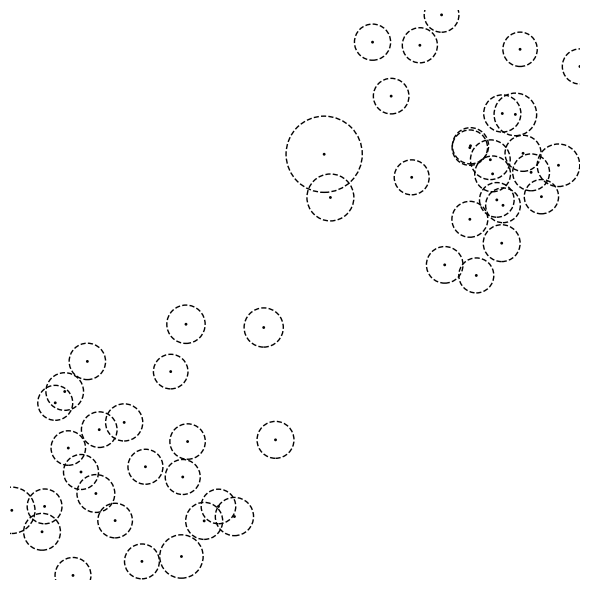

In [4]:
# Clustered
np.random.seed(123)

# Centered lower left
craters = [
    (x[0], x[1], np.random.pareto(1.25) + min_radius, "black", 1, "--", False)
    for x in np.random.randn(1000, 2) * study_region_size / 9.0 + study_region_size / 5
    if 0 < x[0] < study_region_size and 0 < x[1] < study_region_size
][:25]

craters += [
    (x[0], x[1], np.random.pareto(1.25) + min_radius, "black", 1, "--", False)
    for x in np.random.randn(1000, 2) * study_region_size / 9.0 + study_region_size * 4 / 5
    if 0 < x[0] < study_region_size and 0 < x[1] < study_region_size
][:25]

craters_df = pd.DataFrame(craters, columns=["x", "y", "radius", "color", "size", "ls", "fill"])

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), 1, ax, fill=True, color="black")
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.savefig("figures/clustered_example.png")
plt.show()

In [5]:
centers = np.array([(x[0], x[1]) for x in craters])
nn_result = NearestNeighbors(n_neighbors=2, algorithm="brute").fit(centers)
distances, _ = nn_result.kneighbors(centers)
nn_obs = distances[:,1].mean()
nn_exp = 1/(2 * np.sqrt((len(centers)/study_region_size**2)))
sigma = 0.26136 / np.sqrt(len(centers)**2/study_region_size**2)
print(f"Z = {(nn_obs - nn_exp) / sigma}")

Z = -2.472124921157452


In [6]:
cratered_area = calculate_areal_density(
    craters_df,
    study_region_size,
    study_region_padding=0,
    r_stat=0
) * study_region_size**2

nn_exp_za = 1/(2 * np.sqrt((len(centers)/(study_region_size**2 - cratered_area))))
sigma_za = 0.26136 / np.sqrt(len(centers)**2/(study_region_size**2 - cratered_area))
print(f"Z_a = {(nn_obs - nn_exp_za) / sigma_za}")

Z_a = -1.544930853210357


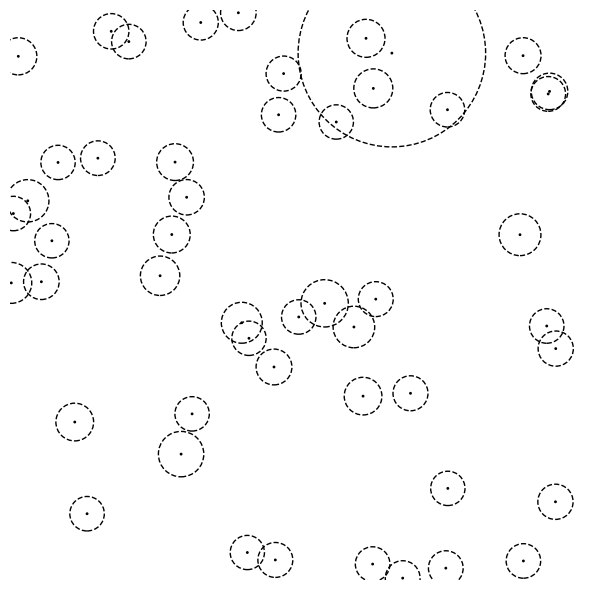

In [7]:
# Random
np.random.seed(12)

# Centered lower left
craters = [
    (x[0], x[1], np.random.pareto(1.25) + min_radius, "black", 1, "--", False)
    for x in np.random.rand(1000, 2) * study_region_size
][:50]

craters_df = pd.DataFrame(craters, columns=["x", "y", "radius", "color", "size", "ls", "fill"])

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), 1, ax, fill=True, color="black")
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.savefig("figures/random_example.png")
plt.show()

In [8]:
centers = np.array([(x[0], x[1]) for x in craters])
nn_result = NearestNeighbors(n_neighbors=2, algorithm="brute").fit(centers)
distances, _ = nn_result.kneighbors(centers)
nn_obs = distances[:,1].mean()
nn_exp = 1/(2 * np.sqrt((len(centers)/study_region_size**2)))
sigma = 0.26136 / np.sqrt(len(centers)**2/study_region_size**2)
print(f"Z = {(nn_obs - nn_exp) / sigma}")

Z = 0.19605577171977795


In [9]:
cratered_area = calculate_areal_density(
    craters_df,
    study_region_size,
    study_region_padding=0,
    r_stat=0
) * study_region_size**2

nn_exp_za = 1/(2 * np.sqrt((len(centers)/(study_region_size**2 - cratered_area))))
sigma_za = 0.26136 / np.sqrt(len(centers)**2/(study_region_size**2 - cratered_area))
print(f"Z_a = {(nn_obs - nn_exp_za) / sigma_za}")

Z_a = 1.794797254135419


/tmp/ipykernel_2149078/2910566929.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ((x + 1) / 8 * study_region_size + float(np.random.randn(1)) * 15, (y + 1) / 8 * study_region_size + float(np.random.randn(1)) * 15, np.random.pareto(1.25) + min_radius, "black", 1, "--", False)


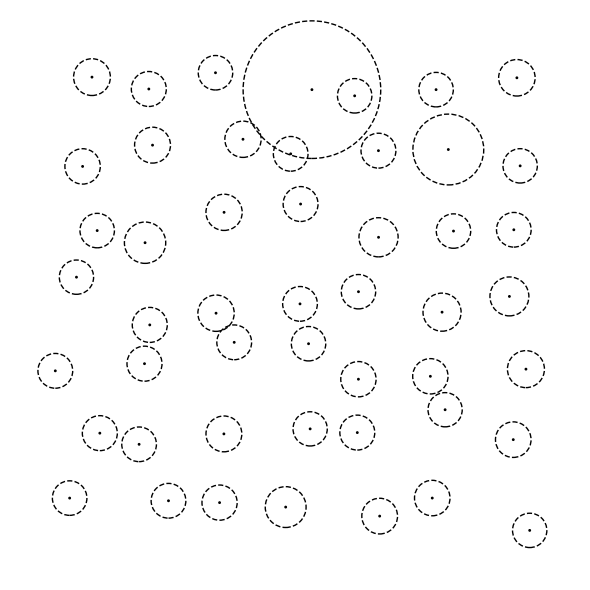

In [10]:
# Uniform
np.random.seed(123)

# Centered lower left
craters = [
    ((x + 1) / 8 * study_region_size + float(np.random.randn(1)) * 15, (y + 1) / 8 * study_region_size + float(np.random.randn(1)) * 15, np.random.pareto(1.25) + min_radius, "black", 1, "--", False)
    for x in range(7)
    for y in range(7)
][:50]

craters_df = pd.DataFrame(craters, columns=["x", "y", "radius", "color", "size", "ls", "fill"])

fig, ax = plt.subplots(figsize=(6, 6))
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), 1, ax, fill=True, color="black")
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
plt.savefig("figures/uniform_example.png")
plt.show()

In [11]:
centers = np.array([(x[0], x[1]) for x in craters])
nn_result = NearestNeighbors(n_neighbors=2, algorithm="brute").fit(centers)
distances, _ = nn_result.kneighbors(centers)
nn_obs = distances[:,1].mean()
nn_exp = 1/(2 * np.sqrt((len(centers)/study_region_size**2)))
sigma = 0.26136 / np.sqrt(len(centers)**2/study_region_size**2)
print(f"Z = {(nn_obs - nn_exp) / sigma}")

Z = 4.917045752562522


In [12]:
cratered_area = calculate_areal_density(
    craters_df,
    study_region_size,
    study_region_padding=0,
    r_stat=0
) * study_region_size**2

nn_exp_za = 1/(2 * np.sqrt((len(centers)/(study_region_size**2 - cratered_area))))
sigma_za = 0.26136 / np.sqrt(len(centers)**2/(study_region_size**2 - cratered_area))
print(f"Z_a = {(nn_obs - nn_exp_za) / sigma_za}")

Z_a = 7.045330803626843
